In [23]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

In [24]:
data = pd.read_csv("weatgerAUS-preprocess.csv")
data.head()
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month_sin', 'month_cos', 'day_sin',
       'day_cos', 'RainTomorrow'],
      dtype='object')

In [25]:
x = data.drop(['RainTomorrow','WindSpeed9am','WindSpeed3pm','MinTemp','MaxTemp','Temp3pm','Cloud3pm'], axis=1)
y = data['RainTomorrow']
#remove high correlation features


In [26]:

#normalize x


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape

(89275, 20)

In [87]:
acc_test=[]
f1_test0=[]
f1_test=[]
y_test0=np.logical_not(y_test)
for i in range (1,40):
    model_tun=KNeighborsClassifier(n_neighbors=i,
                                   weights='distance',
                                  p=1)
    model_tun.fit(x_train,y_train)
    yhat_tun=model_tun.predict(x_test)
    cur_acc=(1-abs(yhat_tun-y_test).sum()/y_test.size)*100
    cur_f1=f1_score(y_test,yhat_tun,zero_division=1)
    cur0_f1=f1_score(y_test0,np.logical_not(yhat_tun))
    acc_test.append(cur_acc)
    f1_test.append(cur_f1)
    f1_test0.append(cur0_f1)

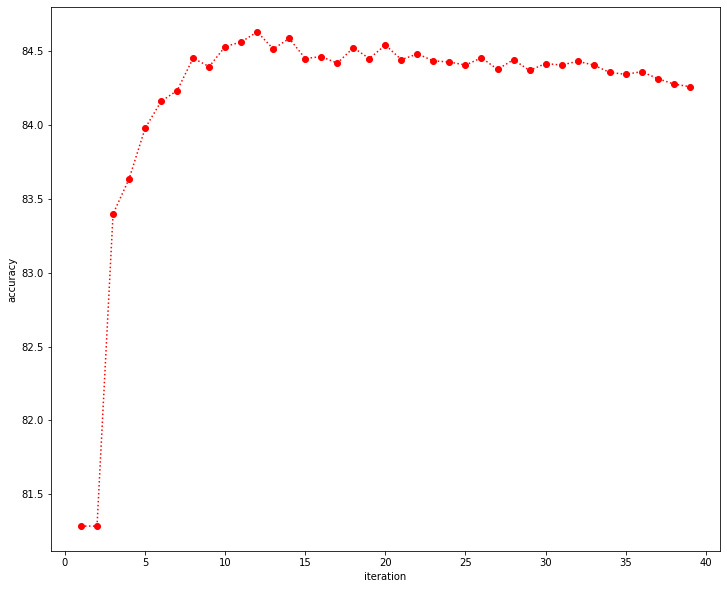

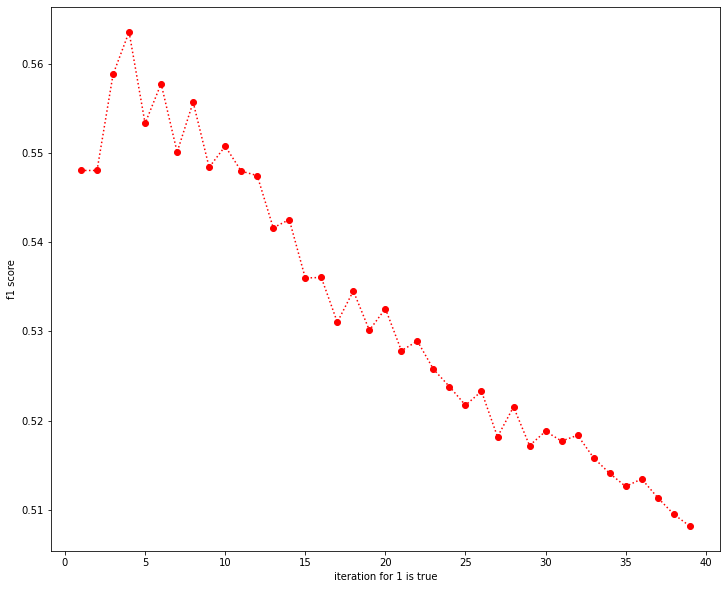

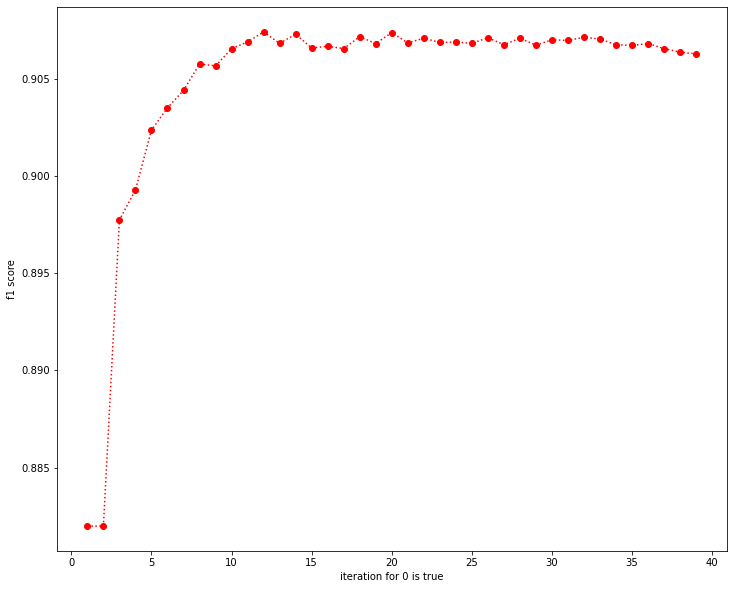

In [88]:
it=np.arange(1,40)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.plot(it,acc_test,'o:r')
plt.show()
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("iteration for 1 is true")
plt.ylabel("f1 score")
plt.plot(it,f1_test,'o:r')
plt.show()

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("iteration for 0 is true")
plt.ylabel("f1 score")
plt.plot(it,f1_test0,'o:r')
plt.show()


In [65]:
acc1_test=[]
acc2_test=[]
f11_test=[]
f12_test=[]
for i in range (15):
    model_lgt1=LogisticRegression(penalty='l1',
                                      C=1.3,
                                      solver='saga',
                                      max_iter=10*i)
    model_lgt2=LogisticRegression(penalty='l2',
                                      C=1.3,
                                      solver='saga',
                                      max_iter=10*i)
    model_lgt1=model_lgt1.fit(x_train,y_train)
    model_lgt2=model_lgt2.fit(x_train,y_train)
    yhat1_tun=model_lgt1.predict(x_test)
    yhat2_tun=model_lgt2.predict(x_test)
    cur1_acc=(1-abs(yhat1_tun-y_test).sum()/y_test.size)*100
    cur2_acc=(1-abs(yhat2_tun-y_test).sum()/y_test.size)*100
    cur1_f1=f1_score(y_test,yhat1_tun)
    cur2_f2=f1_score(y_test,yhat2_tun)
    acc1_test.append(cur1_acc)
    acc2_test.append(cur2_acc)
    f11_test.append(cur1_acc)
    f12_test.append(cur2_acc)
    

/home/lqhung2001/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lqhung2001/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


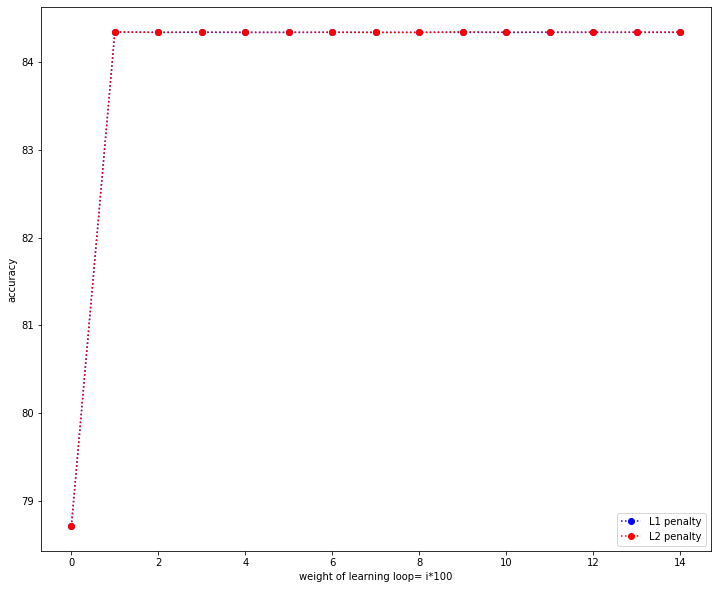

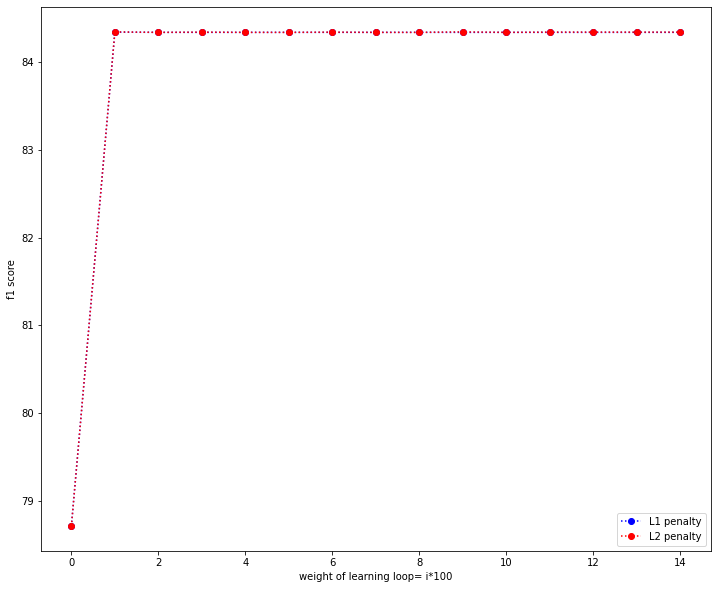

In [66]:
it=np.arange(15)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("weight of learning loop= i*100")
plt.ylabel("accuracy")
plt.plot(it,acc1_test,'o:b',label='L1 penalty')
plt.plot(it,acc2_test,'o:r',label='L2 penalty')
plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("weight of learning loop= i*100")
plt.ylabel("f1 score")
plt.plot(it,f11_test,'o:b',label='L1 penalty')
plt.plot(it,f12_test,'o:r',label='L2 penalty')
plt.legend()
plt.show()



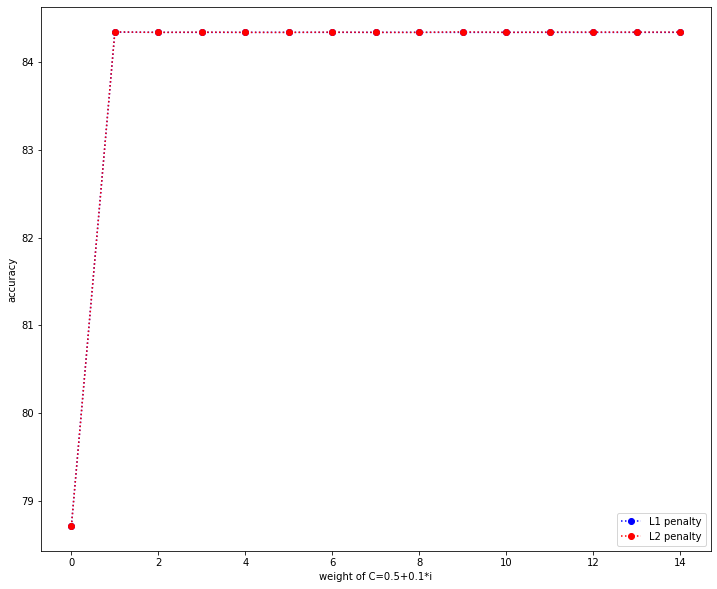

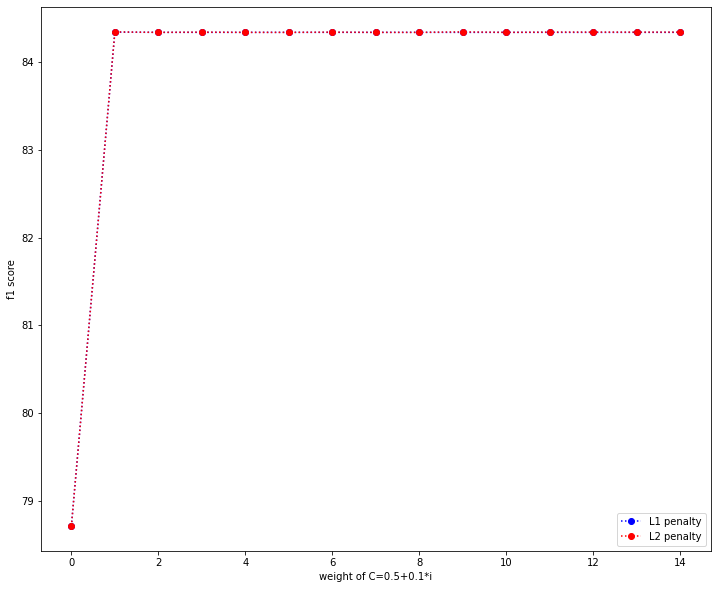

In [67]:
it=np.arange(15)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("weight of C=0.5+0.1*i")
plt.ylabel("accuracy")
plt.plot(it,acc1_test,'o:b',label='L1 penalty')
plt.plot(it,acc2_test,'o:r',label='L2 penalty')
plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.xlabel("weight of C=0.5+0.1*i")
plt.ylabel("f1 score")
plt.plot(it,f11_test,'o:b',label='L1 penalty')
plt.plot(it,f12_test,'o:r',label='L2 penalty')
plt.legend()
plt.show()



In [68]:
model_logistic=LogisticRegression(penalty='l2', 
                                  C=1.3,
                                  solver='saga',
                                  max_iter=1000)
model_knn=KNeighborsClassifier(n_neighbors=6,
                              weights='uniform')

In [69]:
y_train.head()

110686    0
48532     0
45744     0
21211     0
65427     0
Name: RainTomorrow, dtype: int64

In [70]:
model_logistic.fit(x_train,y_train)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [81]:
yhat1_tun=model_logistic.predict(x_train)
yhat2_tun=model_knn.predict(x_train)
cur1_acc=(1-abs(yhat1_tun-y_train).sum()/y_train.size)*100
cur2_acc=(1-abs(yhat2_tun-y_train).sum()/y_train.size)*100
cur1_f1=f1_score(y_train,yhat1_tun)*100
cur2_f2=f1_score(y_train,yhat2_tun)*100
print("the accuracy train for logistic regression is: %.2f %%"% cur1_acc)
print("the accuracy train for knn is: %.2f %%"% cur2_acc)
print("the f1 score train for logistic regressionfor 1 as true is: %.2f %%"% cur1_f1)
print("the f1 score train for knn for 1 as true is: %.2f %%"% cur2_f2)

the accuracy train for logistic regression is: 84.22 %
the accuracy train for knn is: 86.47 %
the f1 score train for logistic regressionfor 1 as true is: 55.56 %
the f1 score train for knn for 1 as true is: 58.82 %


In [82]:
y_train0=np.logical_not(y_train)
yhat1_tun0=np.logical_not(yhat1_tun)
yhat2_tun0=np.logical_not(yhat2_tun)
cur1_f1=f1_score(y_train0,yhat1_tun0)*100
cur2_f2=f1_score(y_train0,yhat2_tun0)*100
print("the f1 score train for logistic regression for 0 as true is: %.2f %%"% cur1_f1)
print("the f1 score train for knn for 0 as true is: %.2f %%"% cur2_f2)

the f1 score train for logistic regression for 0 as true is: 90.41 %
the f1 score train for knn for 0 as true is: 91.91 %


In [83]:
yhat_lgs=model_logistic.predict(x_test)
yhat_knn=model_knn.predict(x_test)

In [84]:
acc1=(1-abs(yhat_lgs-y_test).sum()/y_test.size)*100
acc2=(1-abs(yhat_knn-y_test).sum()/y_test.size)*100
print("the accuracy test for logistic regression is: %.2f %%"% acc1)
print("the accuracy test for knn is: %.2f %%"% acc2)

the accuracy test for logistic regression is: 84.34 %
the accuracy test for knn is: 82.98 %


In [85]:
f1_lgs=f1_score(y_test,yhat_lgs)*100
f1_knn=f1_score(y_test,yhat_knn)*100
print("the f1 score train for logistic regressionfor 1 as true is: %.2f %%"% f1_lgs)
print("the f1 score train for knn for 1 as true is: %.2f %%"% f1_knn)
y_test0=np.logical_not(y_test)
yhat_lgs0=np.logical_not(yhat_lgs)
yhat_knn0=np.logical_not(yhat_knn)
f1_lgs=f1_score(y_test0,yhat_lgs0)*100
f1_knn=f1_score(y_test0,yhat_knn0)*100
print("the f1 score train for logistic regressionfor 0 as true is: %.2f %%"% f1_lgs)
print("the f1 score train for knn for 0 as true is: %.2f %%"% f1_knn)


the f1 score train for logistic regressionfor 1 as true is: 55.46 %
the f1 score train for knn for 1 as true is: 46.53 %
the f1 score train for logistic regressionfor 0 as true is: 90.50 %
the f1 score train for knn for 0 as true is: 89.88 %
